<a href="https://colab.research.google.com/github/VOL-EM2024/mo/blob/main/Laba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.metrics as metrics
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [64]:
df = pd.read_csv('/content/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## **Сожердание:**



price_range: Это целевая переменbattery_power: Общая энергия, которую батарея может накопить за один раз (мАч)

blue: Есть Bluetooth или нет

clock_speed: скорость, с которой микропроцессор выполняет инструкции

dual_sim: Поддерживает две sim-карты или нет

fc: Мегапиксельная фронтальная камера

four_g: Есть 4G или нет

int_memory: Внутренняя память (ГБ)

m_dep: Глубина мобильного устройства (см)

mobile_wt: Вес мобильного телефона

n_cores: Количество ядер процессора

пк: Основная камера (Мп)

px_height: Высота разрешения (п)

px_width: Ширина разрешения (п)

ram: Оперативная память с произвольным доступом (МБ)

sc_h: Высота экрана мобильного устройства (см)

sc_w: Ширина экрана мобильного устройства (см)

talk_time: максимальное время, в течение которого будет длиться один заряд батареи, когда вы находитесь

three_g: Есть 3G или нет

touch_screen: Есть сенсорный экран или нет

wi-Fi: Есть Wi-Fi или нетная со значением 0 (низкая стоимость), 1 (средняя стоимость), 2 (высокая стоимость) и 3 (очень высокая стоимость).

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<Axes: >

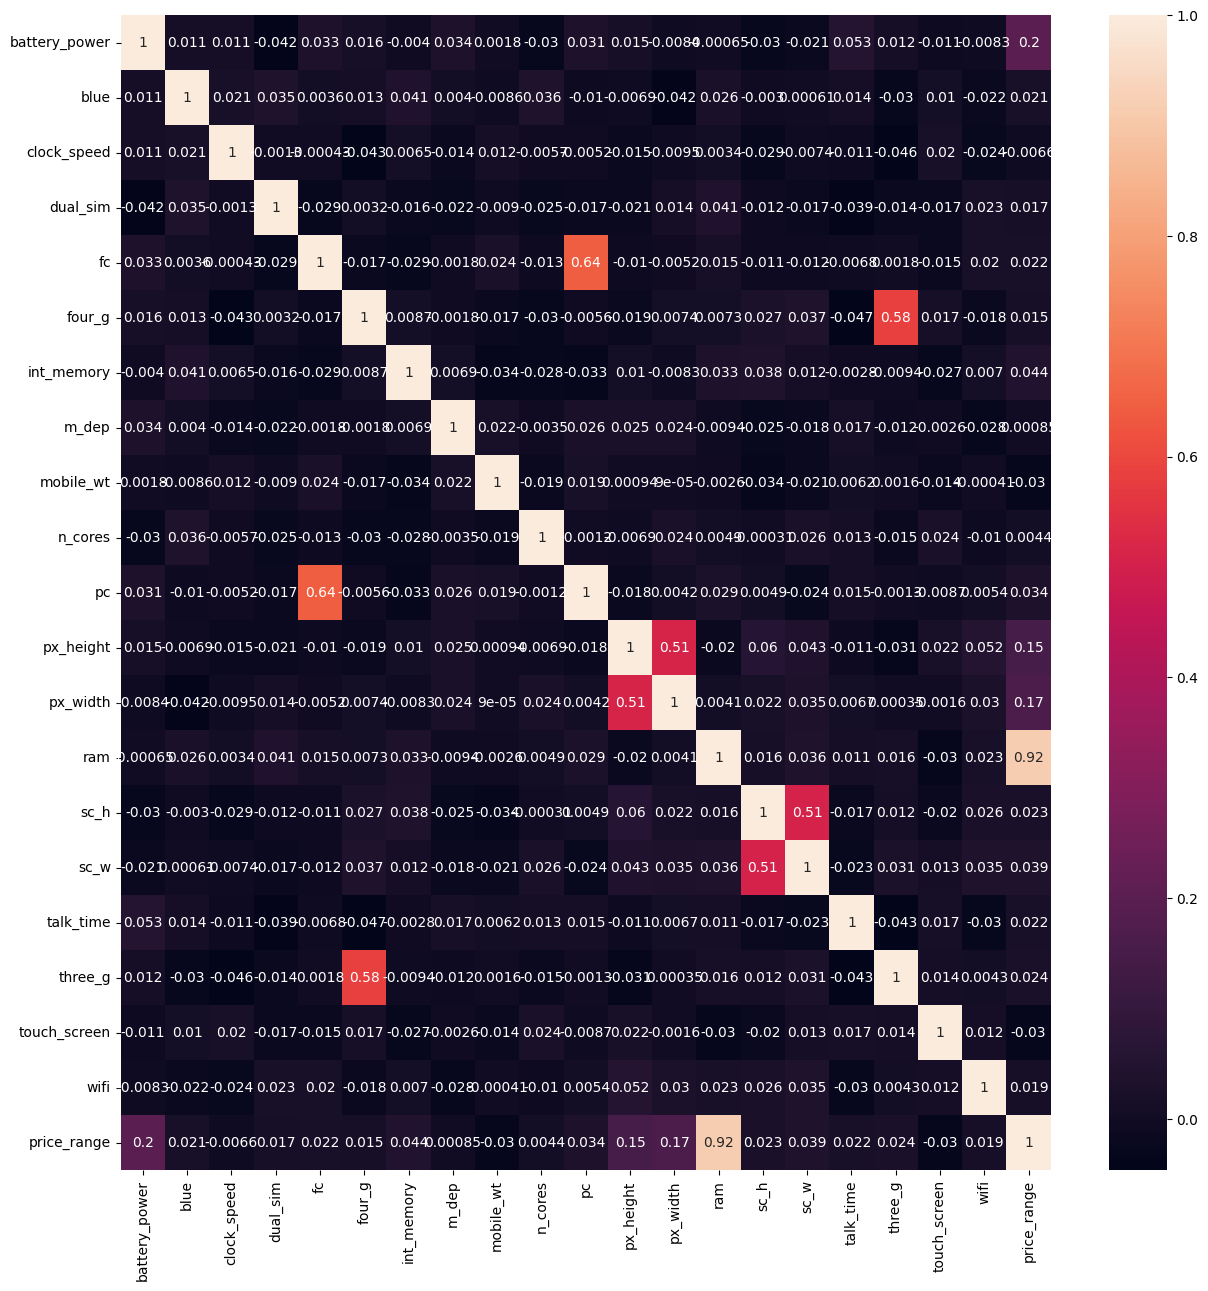

In [67]:
corr=df.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)


Очень положительную корреляцию имеет price_range с ram. Ну и еще несколько позиций
Скажем, что Seed_Variety целевая переменная.

## **1**

In [47]:
from tensorflow import keras
import tensorflow as tf

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score

In [68]:
X = df.drop('price_range', axis=1)
y = df['price_range']
y_encoded = keras.utils.to_categorical(y)

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Создание модели
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_encoded.shape[1], activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2)

# Оценка модели
predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)
y_test_argmax = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test_argmax, predictions)
f1 = f1_score(y_test_argmax, predictions, average='weighted')

print(f"Точность модели: {accuracy:.2f}")
print(f"F1-мера: {f1:.2f}")

Epoch 1/100
40/40 - 1s - loss: 1.4508 - accuracy: 0.2906 - val_loss: 1.2783 - val_accuracy: 0.4688 - 1s/epoch - 30ms/step
Epoch 2/100
40/40 - 0s - loss: 1.2485 - accuracy: 0.4422 - val_loss: 1.1150 - val_accuracy: 0.6125 - 142ms/epoch - 4ms/step
Epoch 3/100
40/40 - 0s - loss: 1.1014 - accuracy: 0.4922 - val_loss: 0.9181 - val_accuracy: 0.6594 - 151ms/epoch - 4ms/step
Epoch 4/100
40/40 - 0s - loss: 0.9212 - accuracy: 0.5922 - val_loss: 0.7517 - val_accuracy: 0.7063 - 241ms/epoch - 6ms/step
Epoch 5/100
40/40 - 0s - loss: 0.8008 - accuracy: 0.6375 - val_loss: 0.6293 - val_accuracy: 0.7875 - 268ms/epoch - 7ms/step
Epoch 6/100
40/40 - 0s - loss: 0.6923 - accuracy: 0.6992 - val_loss: 0.5472 - val_accuracy: 0.8375 - 372ms/epoch - 9ms/step
Epoch 7/100
40/40 - 0s - loss: 0.6137 - accuracy: 0.7383 - val_loss: 0.4787 - val_accuracy: 0.8594 - 338ms/epoch - 8ms/step
Epoch 8/100
40/40 - 0s - loss: 0.5703 - accuracy: 0.7516 - val_loss: 0.4396 - val_accuracy: 0.8656 - 278ms/epoch - 7ms/step
Epoch 9/10

Точность модели: 0.92

In [69]:
y_encoded

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

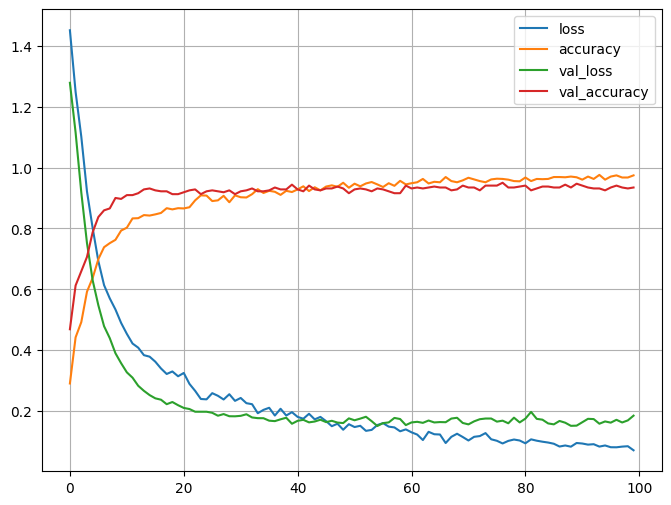

In [70]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.grid(True)
plt.show()

In [71]:
#проверка на тестовых данных
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9175


[0.19972771406173706, 0.9175000190734863]

In [72]:
y_test

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [91]:
import plotly.graph_objects as go
true_vs_pred_df = pd.DataFrame({
    'Истинные': y_test_argmax[:100],
    'Предсказанные': predictions[:100]
})

x_values = np.arange(len(true_vs_pred_df))

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values, y=true_vs_pred_df['Истинные'],
                         mode='lines', name='Истинные'))

fig.add_trace(go.Scatter(x=x_values, y=true_vs_pred_df['Предсказанные'],
                         mode='lines+markers', name='Предсказанные'))

fig.update_layout(
    title='Сравнение истинных и предсказанных значений'
)

fig.show()

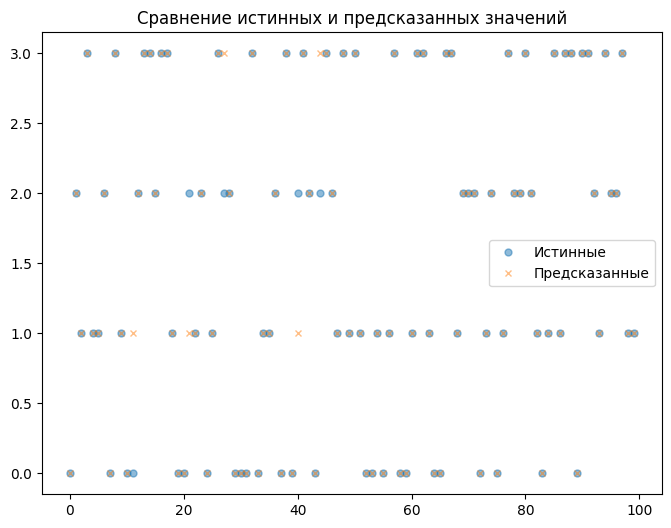

In [92]:
# Создаем DataFrame для удобства визуализации
true_vs_pred_df = pd.DataFrame({'Истинные': y_test_argmax[:100], 'Предсказанные': predictions[:100]})

# Генерируем последовательность индексов для оси X
x_axis = range(len(true_vs_pred_df))

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(x_axis, true_vs_pred_df['Истинные'], marker='o', linestyle='', markersize=5, label='Истинные', alpha=0.5)
plt.plot(x_axis, true_vs_pred_df['Предсказанные'], marker='x', linestyle='', markersize=5, label='Предсказанные', alpha=0.5)
plt.title('Сравнение истинных и предсказанных значений')
plt.legend()
plt.show()

## **2**

In [75]:
# Создание модели
model2 = Sequential([
    Dense(20, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(10, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')
])

# Компиляция модели
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Обучение модели
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=2)

# Оценка модели
predictions2 = model2.predict(X_test)
predictions2 = predictions2.argmax(axis=1)
y_test_argmax2 = y_test.argmax(axis=1)

accuracy2 = accuracy_score(y_test_argmax2, predictions2)
f12 = f1_score(y_test_argmax2, predictions2, average='weighted')

print(f"Точность модели: {accuracy2:.2f}")
print(f"F1-мера: {f12:.2f}")

Epoch 1/50
40/40 - 2s - loss: 0.2019 - accuracy: 0.2359 - val_loss: 0.1950 - val_accuracy: 0.2281 - 2s/epoch - 49ms/step
Epoch 2/50
40/40 - 0s - loss: 0.1907 - accuracy: 0.2648 - val_loss: 0.1876 - val_accuracy: 0.2406 - 295ms/epoch - 7ms/step
Epoch 3/50
40/40 - 0s - loss: 0.1842 - accuracy: 0.2969 - val_loss: 0.1827 - val_accuracy: 0.2625 - 218ms/epoch - 5ms/step
Epoch 4/50
40/40 - 0s - loss: 0.1789 - accuracy: 0.3500 - val_loss: 0.1780 - val_accuracy: 0.2969 - 251ms/epoch - 6ms/step
Epoch 5/50
40/40 - 0s - loss: 0.1729 - accuracy: 0.3938 - val_loss: 0.1725 - val_accuracy: 0.3594 - 233ms/epoch - 6ms/step
Epoch 6/50
40/40 - 0s - loss: 0.1661 - accuracy: 0.4328 - val_loss: 0.1664 - val_accuracy: 0.4219 - 255ms/epoch - 6ms/step
Epoch 7/50
40/40 - 0s - loss: 0.1591 - accuracy: 0.4734 - val_loss: 0.1597 - val_accuracy: 0.4437 - 206ms/epoch - 5ms/step
Epoch 8/50
40/40 - 0s - loss: 0.1519 - accuracy: 0.5234 - val_loss: 0.1535 - val_accuracy: 0.4906 - 248ms/epoch - 6ms/step
Epoch 9/50
40/40 -

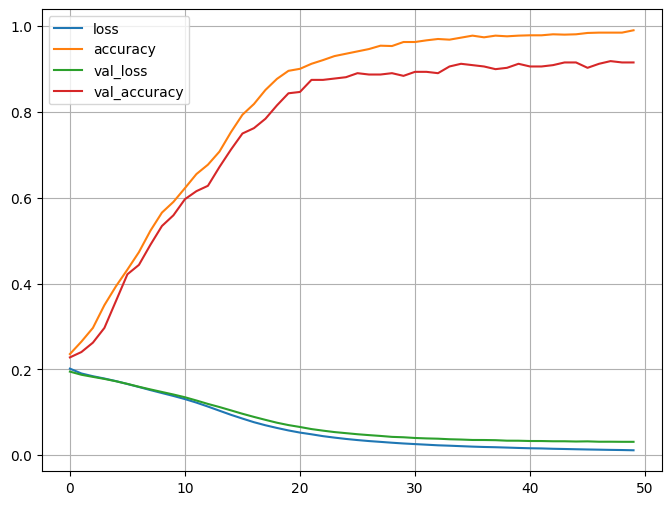

In [101]:
pd.DataFrame(history2.history).plot(figsize=(8,6))
plt.grid(True)
plt.show()

In [80]:
#проверка на тестовых данных
model2.evaluate(X_test,y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9150


[0.030259406194090843, 0.9150000214576721]

In [94]:
true_vs_pred_df2 = pd.DataFrame({
    'Истинные': y_test_argmax2[:100],
    'Предсказанные': predictions2[:100]
})

x_values2 = np.arange(len(true_vs_pred_df2))

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values2, y=true_vs_pred_df2['Истинные'],
                         mode='lines', name='Истинные'))

fig.add_trace(go.Scatter(x=x_values2, y=true_vs_pred_df2['Предсказанные'],
                         mode='lines+markers', name='Предсказанные'))

fig.update_layout(
    title='Сравнение истинных и предсказанных значений'
)

fig.show()

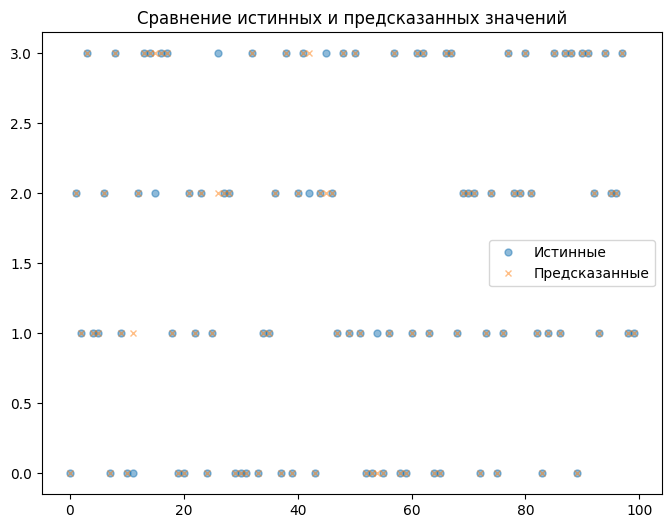

In [95]:
x_axis2 = range(len(true_vs_pred_df2))

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(x_axis2, true_vs_pred_df2['Истинные'], marker='o', linestyle='', markersize=5, label='Истинные', alpha=0.5)
plt.plot(x_axis2, true_vs_pred_df2['Предсказанные'], marker='x', linestyle='', markersize=5, label='Предсказанные', alpha=0.5)
plt.title('Сравнение истинных и предсказанных значений')
plt.legend()
plt.show()

### **`3`**

In [96]:
# Создание модели
model3 = Sequential([
    Dense(20, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(40, activation='relu'),
    Dense(y_encoded.shape[1], activation='relu')
])

# Компиляция модели
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Обучение модели
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=2)

# Оценка модели
predictions3 = model3.predict(X_test)
predictions3 = predictions3.argmax(axis=1)
y_test_argmax3 = y_test.argmax(axis=1)

accuracy3 = accuracy_score(y_test_argmax3, predictions3)
f13 = f1_score(y_test_argmax3, predictions3, average='weighted')

print(f"Точность модели: {accuracy3:.2f}")
print(f"F1: {f13:.2f}")

Epoch 1/20
40/40 - 1s - loss: 0.2340 - accuracy: 0.2602 - val_loss: 0.2170 - val_accuracy: 0.3250 - 1s/epoch - 27ms/step
Epoch 2/20
40/40 - 0s - loss: 0.2069 - accuracy: 0.3484 - val_loss: 0.1883 - val_accuracy: 0.4094 - 121ms/epoch - 3ms/step
Epoch 3/20
40/40 - 0s - loss: 0.1769 - accuracy: 0.4734 - val_loss: 0.1642 - val_accuracy: 0.5250 - 117ms/epoch - 3ms/step
Epoch 4/20
40/40 - 0s - loss: 0.1539 - accuracy: 0.5484 - val_loss: 0.1515 - val_accuracy: 0.5594 - 148ms/epoch - 4ms/step
Epoch 5/20
40/40 - 0s - loss: 0.1387 - accuracy: 0.6102 - val_loss: 0.1422 - val_accuracy: 0.5906 - 126ms/epoch - 3ms/step
Epoch 6/20
40/40 - 0s - loss: 0.1271 - accuracy: 0.6516 - val_loss: 0.1348 - val_accuracy: 0.6344 - 137ms/epoch - 3ms/step
Epoch 7/20
40/40 - 0s - loss: 0.1180 - accuracy: 0.6898 - val_loss: 0.1292 - val_accuracy: 0.6750 - 127ms/epoch - 3ms/step
Epoch 8/20
40/40 - 0s - loss: 0.1101 - accuracy: 0.7297 - val_loss: 0.1244 - val_accuracy: 0.6781 - 119ms/epoch - 3ms/step
Epoch 9/20
40/40 -

Точность модели: 0.88

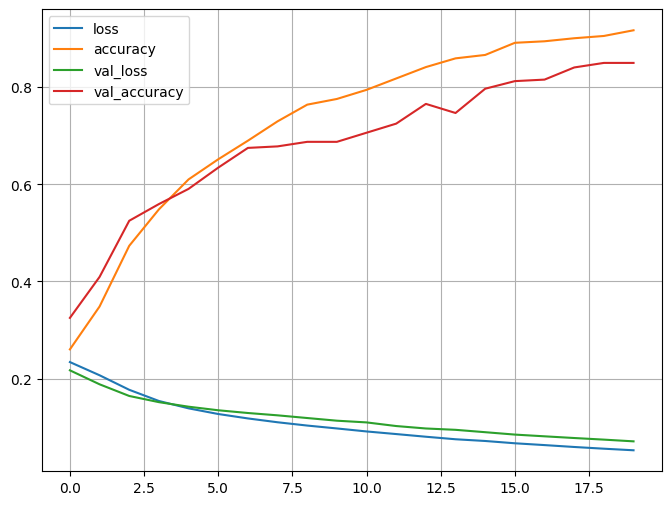

In [102]:
pd.DataFrame(history3.history).plot(figsize=(8,6))
plt.grid(True)
plt.show()

In [87]:
#проверка на тестовых данных
model3.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.8825


[0.0566122904419899, 0.8824999928474426]

In [97]:
true_vs_pred_df3 = pd.DataFrame({
    'Истинные': y_test_argmax3[:100],
    'Предсказанные': predictions3[:100]
})

x_values3 = np.arange(len(true_vs_pred_df3))

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values3, y=true_vs_pred_df3['Истинные'],
                         mode='lines', name='Истинные'))

fig.add_trace(go.Scatter(x=x_values3, y=true_vs_pred_df3['Предсказанные'],
                         mode='lines+markers', name='Предсказанные'))

fig.update_layout(
    title='Сравнение истинных и предсказанных значений'
)

fig.show()

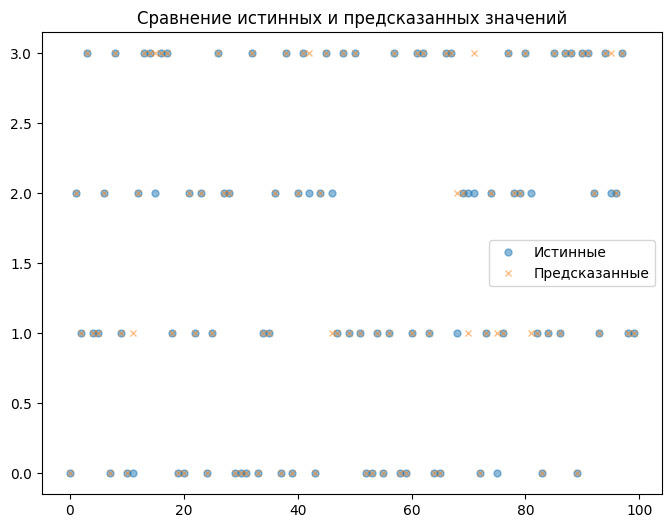

In [98]:
x_axis3 = range(len(true_vs_pred_df3))

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(x_axis3, true_vs_pred_df3['Истинные'], marker='o', linestyle='', markersize=5, label='Истинные', alpha=0.5)
plt.plot(x_axis3, true_vs_pred_df3['Предсказанные'], marker='x', linestyle='', markersize=5, label='Предсказанные', alpha=0.5)
plt.title('Сравнение истинных и предсказанных значений')
plt.legend()
plt.show()

In [99]:
cm = confusion_matrix(predictions,y_test_argmax)

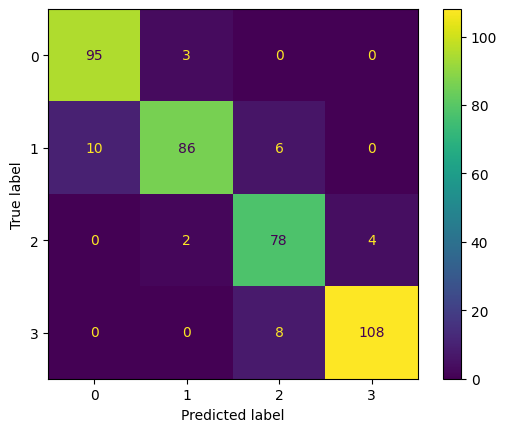

In [100]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Bсего 25 значений было отнесено неверно из 400
Между соседними классами (1 и 2) наблюдаются несколько ошибок, что может свидетельствовать о том что различий в этих классах почти нет

*реализовать функцию, которая по входным параметрам возвращает предсказанное с помощью нейросети значение*

In [103]:
def func(input_data):
  input_scaled = scaler.transform(input_data)
  prediction_probs = model.predict(input_scaled)
  predictions = prediction_probs.argmax(axis=1)

  return predictions

In [104]:
df_one = df.drop('price_range', axis=1)
one_prediction = func(df_one.head(1))
one_prediction[0]

1/1 [==============================] - 0s 95ms/step


1